<a href="https://colab.research.google.com/github/sfansaria/Real-Fake-Job-Post/blob/main/Real_Fake_Job_Posting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [72]:
#Import libraries

import numpy as np
import pandas as pd
import sklearn_pandas

import sklearn as sk
#For data visualization
import seaborn as sns
import matplotlib.pyplot as plt
#for classification
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
#for train-test splitting
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn import feature_selection
from sklearn.impute import SimpleImputer




In [73]:
data_job_post = pd.read_csv('/content/drive/My Drive/ml_datasets/fake_job_postings.csv')
print(data_job_post.head(3))

   job_id                                      title          location  \
0       1                           Marketing Intern  US, NY, New York   
1       2  Customer Service - Cloud Video Production    NZ, , Auckland   
2       3    Commissioning Machinery Assistant (CMA)     US, IA, Wever   

  department salary_range                                    company_profile  \
0  Marketing          NaN  We're Food52, and we've created a groundbreaki...   
1    Success          NaN  90 Seconds, the worlds Cloud Video Production ...   
2        NaN          NaN  Valor Services provides Workforce Solutions th...   

                                         description  \
0  Food52, a fast-growing, James Beard Award-winn...   
1  Organised - Focused - Vibrant - Awesome!Do you...   
2  Our client, located in Houston, is actively se...   

                                        requirements  \
0  Experience with content management systems a m...   
1  What we expect from you:Your key responsib

In [74]:
print(data_job_post.shape)

(17880, 18)


In [75]:
print(data_job_post.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [76]:
#Exploratory Data Analysis
#Data Visualizations

data_job_post['function'].value_counts()

Information Technology    1749
Sales                     1468
Engineering               1348
Customer Service          1229
Marketing                  830
Administrative             630
Design                     340
Health Care Provider       338
Other                      325
Education                  325
Management                 317
Business Development       228
Accounting/Auditing        212
Human Resources            205
Project Management         183
Finance                    172
Consulting                 144
Writing/Editing            132
Art/Creative               132
Production                 116
Product Management         114
Quality Assurance          111
Advertising                 90
Business Analyst            84
Data Analyst                82
Public Relations            76
Manufacturing               74
General Business            68
Research                    50
Legal                       47
Strategy/Planning           46
Training                    38
Supply C

In [77]:
stem = ['Information Technology', 'Engineering', 'Data Analyst', 'Science', 'Business Analyst', 'Quality Assurance']


non_stem = ['Sales', 'Customer Service', 'Marketing', 'Administrative', 'Design', 'Human Resources']

data_stem = data_job_post[data_job_post['function'].isin(stem)]
print(data_stem.shape)
data_non_stem = data_job_post[data_job_post['function'].isin(non_stem)]
print(data_non_stem.shape)

(3388, 18)
(4702, 18)


In [78]:
data_non_stem['fraudulent'].value_counts()

0    4453
1     249
Name: fraudulent, dtype: int64

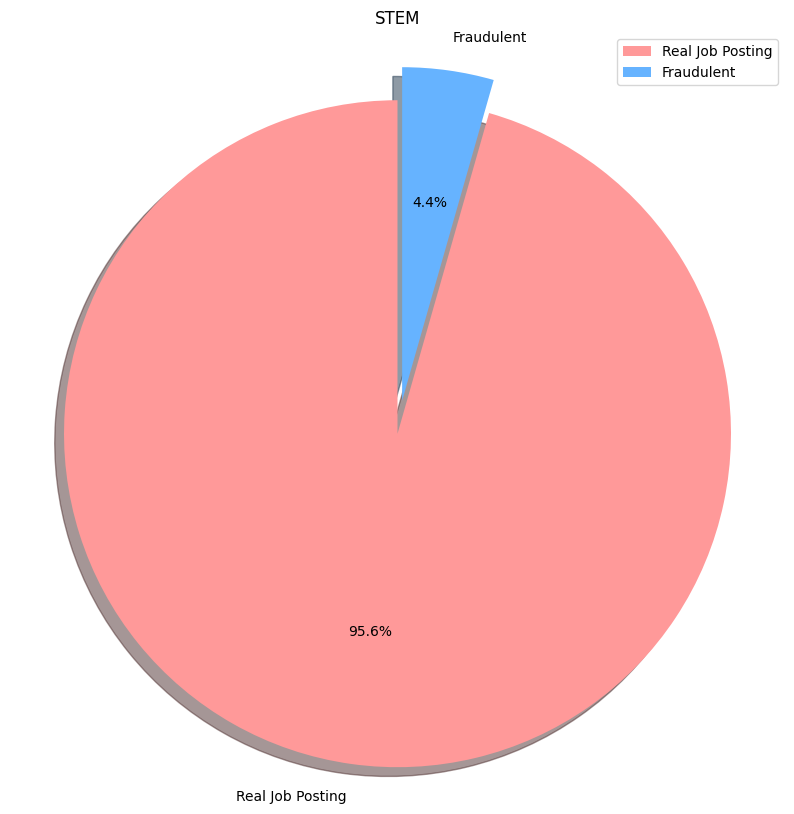

In [79]:
#stem with fraudulent negative
stem_zero = data_stem['fraudulent'].value_counts()[0]
#stem with fraudulent positive
stem_one = data_stem['fraudulent'].value_counts()[1]

#non_stem with fraudulent negative
non_stem_zero = data_non_stem['fraudulent'].value_counts()[0]
#non_stem with fraudulent positive
non_stem_one = data_non_stem['fraudulent'].value_counts()[1]

#Pie chart where the slices will be ordered and plotted counter-clockwise

labels = 'Real Job Posting', 'Fraudulent'
sizes = [stem_zero, stem_one]
explode = (0, 0.1) #only "explode" the 2nd slice (i.e. "Hogs")
#add colors
colors = ['#ff9999','#66b3ff']
fig1, ax1 = plt.subplots(figsize=(10, 10))
ax1.pie(sizes, explode=explode, colors=colors, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90)
ax1.axis('equal') #Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('STEM')
plt.legend()
plt.show()

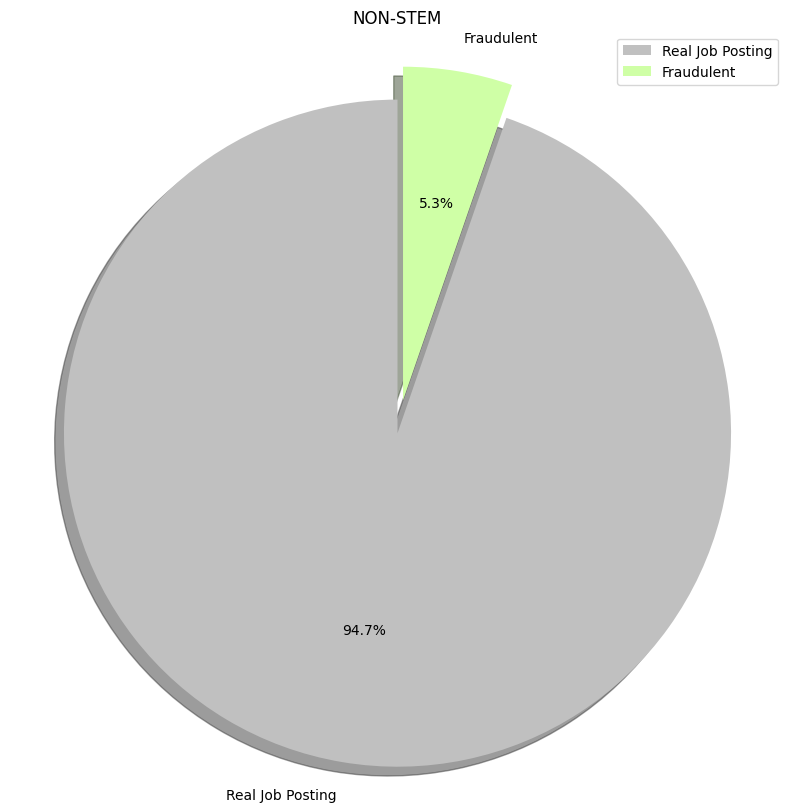

In [80]:
labels = 'Real Job Posting', 'Fraudulent'
sizes = [non_stem_zero, non_stem_one]
explode = (0, 0.1) #only "explode" the 2nd slice (i.e. "Hogs")
#add colors
colors =  ['#C0C0C0','#CFFFA6']
fig1, ax1 = plt.subplots(figsize=(10, 10))
ax1.pie(sizes, explode=explode, colors=colors, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90)
ax1.axis('equal') #Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('NON-STEM')
plt.legend()
plt.show()

In [81]:
data_real = data_job_post.loc[data_job_post['fraudulent']==0]
data_fake = data_job_post.loc[data_job_post['fraudulent']==1]

data_real['description'] = data_real['description'].astype('str')
data_fake['description'] = data_fake['description'].astype('str')

<ipython-input-81-d822e6dfc204>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_real['description'] = data_real['description'].astype('str')
<ipython-input-81-d822e6dfc204>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_fake['description'] = data_fake['description'].astype('str')


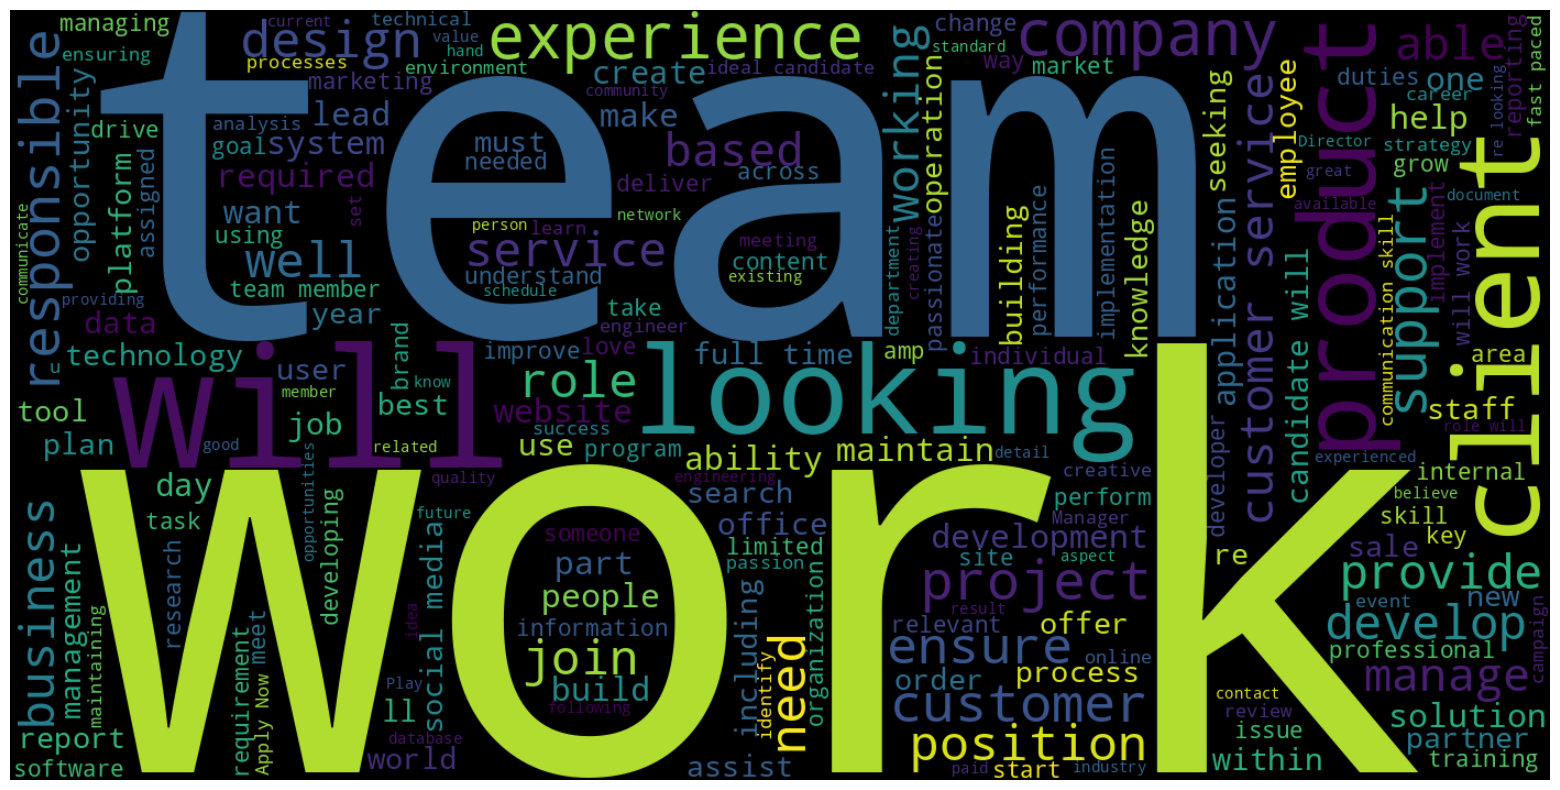

In [82]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

target_text = " ".join(data_real['description'])
wordcloud = WordCloud(width=1400, height=700).generate(text=target_text)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

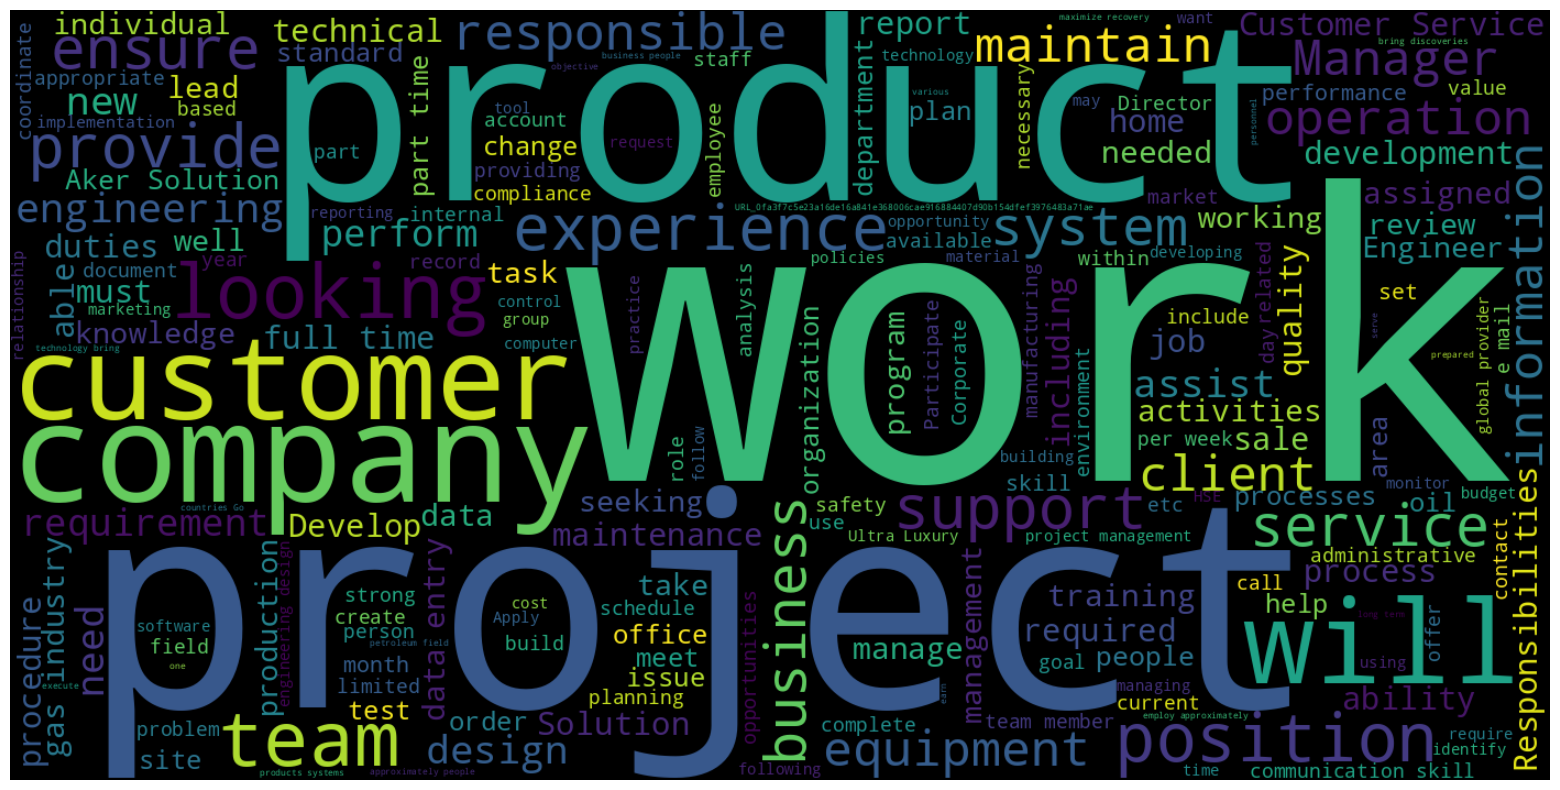

In [83]:
target_text = " ".join(data_fake['description'])
wordcloud = WordCloud(width=1400, height=700).generate(text=target_text)
plt.figure(figsize=(20,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [84]:
#Data Cleaning And Feature Engineering

#Missing data

print(data_job_post.isnull().sum())


job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64


In [85]:
#Filling the missing spaces

data_job_post['department'] = data_job_post['department'].fillna(data_job_post['department'].mode()[0])


data_categ_imp = SimpleImputer(strategy="constant",fill_value="Missing")
categ_imp_feature = ["title","location","department","salary_range","company_profile",
                     "description","requirements","benefits",
                 "employment_type","required_experience","required_education","industry","function"]

data_numeric_imp = SimpleImputer(strategy="constant",fill_value=None)
num_imp_feature =["job_id","telecommuting","has_company_logo","has_questions","fraudulent"]

#Transforming into columns
data_imp_trans = ColumnTransformer([("data_categ_imp",data_categ_imp,categ_imp_feature),("data_numeric_imp",data_numeric_imp,num_imp_feature)])

#Transforming and assigning the data
transformed_data = data_imp_trans.fit_transform(data_job_post)
print(transformed_data)

[['Marketing Intern' 'US, NY, New York' 'Marketing' ... 1 0 0]
 ['Customer Service - Cloud Video Production' 'NZ, , Auckland' 'Success'
  ... 1 0 0]
 ['Commissioning Machinery Assistant (CMA)' 'US, IA, Wever' 'Sales' ... 1
  0 0]
 ...
 ['Project Cost Control Staff Engineer - Cost Control Exp - TX'
  'US, TX, Houston' 'Sales' ... 0 0 0]
 ['Graphic Designer' 'NG, LA, Lagos' 'Sales' ... 0 1 0]
 ['Web Application Developers' 'NZ, N, Wellington' 'Engineering' ... 1 1
  0]]


In [86]:
#Transforming the data into data frame
data_job_transformed_data = pd.DataFrame(transformed_data, columns= ["title","location","department","salary_range","company_profile","description",
                                  "requirements","benefits", "employment_type","required_experience","required_education",
                                  "industry","function","job_id","telecommuting","has_company_logo","has_questions",
                                  "fraudulent"])
data_job_transformed_data

title  \
0                                       Marketing Intern   
1              Customer Service - Cloud Video Production   
2                Commissioning Machinery Assistant (CMA)   
3                      Account Executive - Washington DC   
4                                    Bill Review Manager   
...                                                  ...   
17875                   Account Director - Distribution    
17876                                 Payroll Accountant   
17877  Project Cost Control Staff Engineer - Cost Con...   
17878                                   Graphic Designer   
17879                         Web Application Developers   

                   location   department salary_range  \
0          US, NY, New York    Marketing      Missing   
1            NZ, , Auckland      Success      Missing   
2             US, IA, Wever        Sales      Missing   
3        US, DC, Washington        Sales      Missing   
4        US, FL, Fort Worth        Sales      Missing   
...                     ...          ...          ...   
17875       CA, ON, Toronto        Sales      Missing   
17876  US, PA, Philadelphia   Accounting      Missing   
17877       US, TX, Houston        Sales      Missing   
17878         NG, LA, Lagos        Sales      Missing   
17879     NZ, N, Wellington  Engineering      Missing   

                                         company_profile  \
0      We're Food52, and we've created a groundbreaki...   
1      90 Seconds, the worlds Cloud Video Production ...   
2      Valor Services provides Workforce Solutions th...   
3      Our passion for improving quality of life thro...   
4      SpotSource Solutions LLC is a Global Human Cap...   
...                                                  ...   
17875  Vend is looking for some awesome new talent to...   
17876  WebLinc is the e-commerce platform and service...   
17877  We Provide Full Time Permanent Positions for m...   
17878                                            Missing   
17879  Vend is looking for some awesome new talent to...   

                                             description  \
0      Food52, a fast-growing, James Beard Award-winn...   
1      Organised - Focused - Vibrant - Awesome!Do you...   
2      Our client, located in Houston, is actively se...   
3      THE COMPANY: ESRI – Environmental Systems Rese...   
4      JOB TITLE: Itemization Review ManagerLOCATION:...   
...                                                  ...   
17875  Just in case this is the first time you’ve vis...   
17876  The Payroll Accountant will focus primarily on...   
17877  Experienced Project Cost Control Staff Enginee...   
17878  Nemsia Studios is looking for an experienced v...   
17879  Who are we?Vend is an award winning web based ...   

                                            requirements  \
0      Experience with content management systems a m...   
1      What we expect from you:Your key responsibilit...   
2      Implement pre-commissioning and commissioning ...   
3      EDUCATION: Bachelor’s or Master’s in GIS, busi...   
4      QUALIFICATIONS:RN license in the State of Texa...   
...                                                  ...   
17875  To ace this role you:Will eat comprehensive St...   
17876  - B.A. or B.S. in Accounting- Desire to have f...   
17877  At least 12 years professional experience.Abil...   
17878  1. Must be fluent in the latest versions of Co...   
17879  We want to hear from you if:You have an in-dep...   

                                                benefits employment_type  \
0                                                Missing           Other   
1      What you will get from usThrough being part of...       Full-time   
2                                                Missing         Missing   
3      Our culture is anything but corporate—we have ...       Full-time   
4                                  Full Benefits Offered       Full-time   
...                       

In [87]:
X_trans = data_job_transformed_data.drop("fraudulent",axis=1)
y_trans = data_job_transformed_data.fraudulent

y_trans = y_trans.astype('int')
print(X_trans.shape)
print(y_trans.shape)
print(X_trans.columns)

(17880, 17)
(17880,)
Index(['title', 'location', 'department', 'salary_range', 'company_profile',
       'description', 'requirements', 'benefits', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'job_id', 'telecommuting', 'has_company_logo', 'has_questions'],
      dtype='object')


In [88]:
#Instantation of One Hot Encoder for categorical data transformation into Numeric
one_hot = OneHotEncoder()
clf_trans = ColumnTransformer([("one_hot",one_hot,categ_imp_feature)],remainder="passthrough")
X_trans_fin = clf_trans.fit_transform(X_trans)
np.array(X_trans_fin)



array(<17880x51438 sparse matrix of type '<class 'numpy.float64'>'
	with 274099 stored elements in Compressed Sparse Row format>,
      dtype=object)

In [89]:
#Train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_trans_fin, y_trans, test_size=0.25,random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((13410, 51438), (4470, 51438), (13410,), (4470,))

In [90]:
#Data Modeling
#Random Forest, Decision Tree, Logistic Regression, Neural Network MLP
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

#Random Forest
model_rfm = RandomForestClassifier(random_state=42)
model_rfm.fit(X_train, y_train)
y_pred_rfm = model_rfm.predict(X_test)
rfc_accuracy = model_rfm.score(X_test, y_test)

#Decision Tree
model_dtc = DecisionTreeClassifier(random_state=42)
model_dtc.fit(X_train,y_train)
y_pred_dtc = model_dtc.predict(X_test)
dtc_accuracy = model_dtc.score(X_test, y_test)

#Logistic Regression

model_lr = LogisticRegression(solver='newton-cg', random_state=42)
model_lr.fit(X_train, y_train)
y_prob = model_lr.predict_proba(X_test)
y_pred_lr = pd.Series([1 if x > 0.5 else 0 for x in y_prob[:,1]], index=y_test.index)
lr_accuracy = model_lr.score(X_test, y_test)

#Neural Network ----MLPClassifier

nn_clf = MLPClassifier(hidden_layer_sizes=(10,10,10,),max_iter=100,activation = 'logistic', solver='lbfgs',learning_rate='constant',verbose=1,random_state=42)
nn_clf.fit(X_train, y_train)
y_pred_mlp = nn_clf.predict(X_test)
nn_clf_accuracy = accuracy_score(y_pred_mlp, y_test)


print("Random Forest accuracy", rfc_accuracy)
print("Decision Tree accuracy", dtc_accuracy)
print("Logistic Regression accuracy", lr_accuracy)
print("Neural Network accuracy", nn_clf_accuracy)


Random Forest accuracy 0.983668903803132
Decision Tree accuracy 0.9885906040268456
Logistic Regression accuracy 0.9816554809843401
Neural Network accuracy 0.9501118568232663


<BarContainer object of 4 artists>

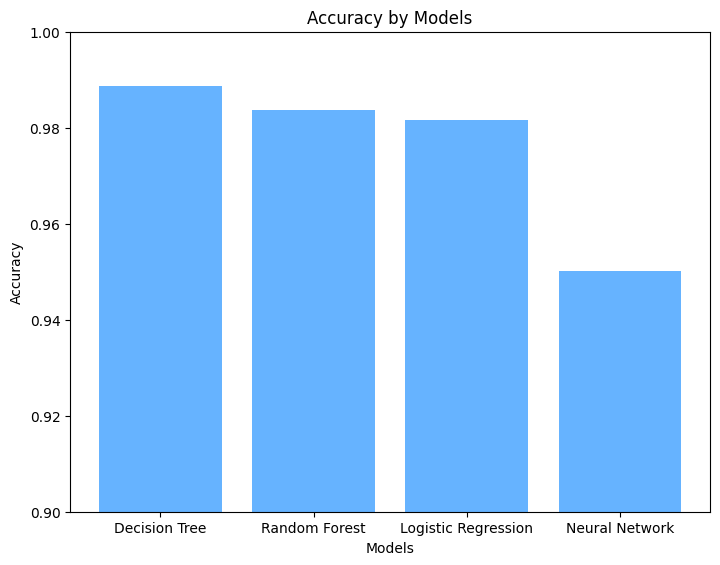

In [91]:
#Models ordered by Accuracy
fig = plt.figure()
color = ['#66b3ff']
ax = fig.add_axes([0,0,1,1])
models = ['Decision Tree', 'Random Forest', 'Logistic Regression', 'Neural Network']
accuracy = [dtc_accuracy, rfc_accuracy,lr_accuracy,nn_clf_accuracy]
ax.bar(models,accuracy)
ax.set_ylim([0.9, 1])
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy by Models')
plt.bar(models, height = accuracy, color=color)


<ipython-input-92-44d15b80669b>:8: RuntimeWarning: divide by zero encountered in log
  log_val.append(np.log(i))


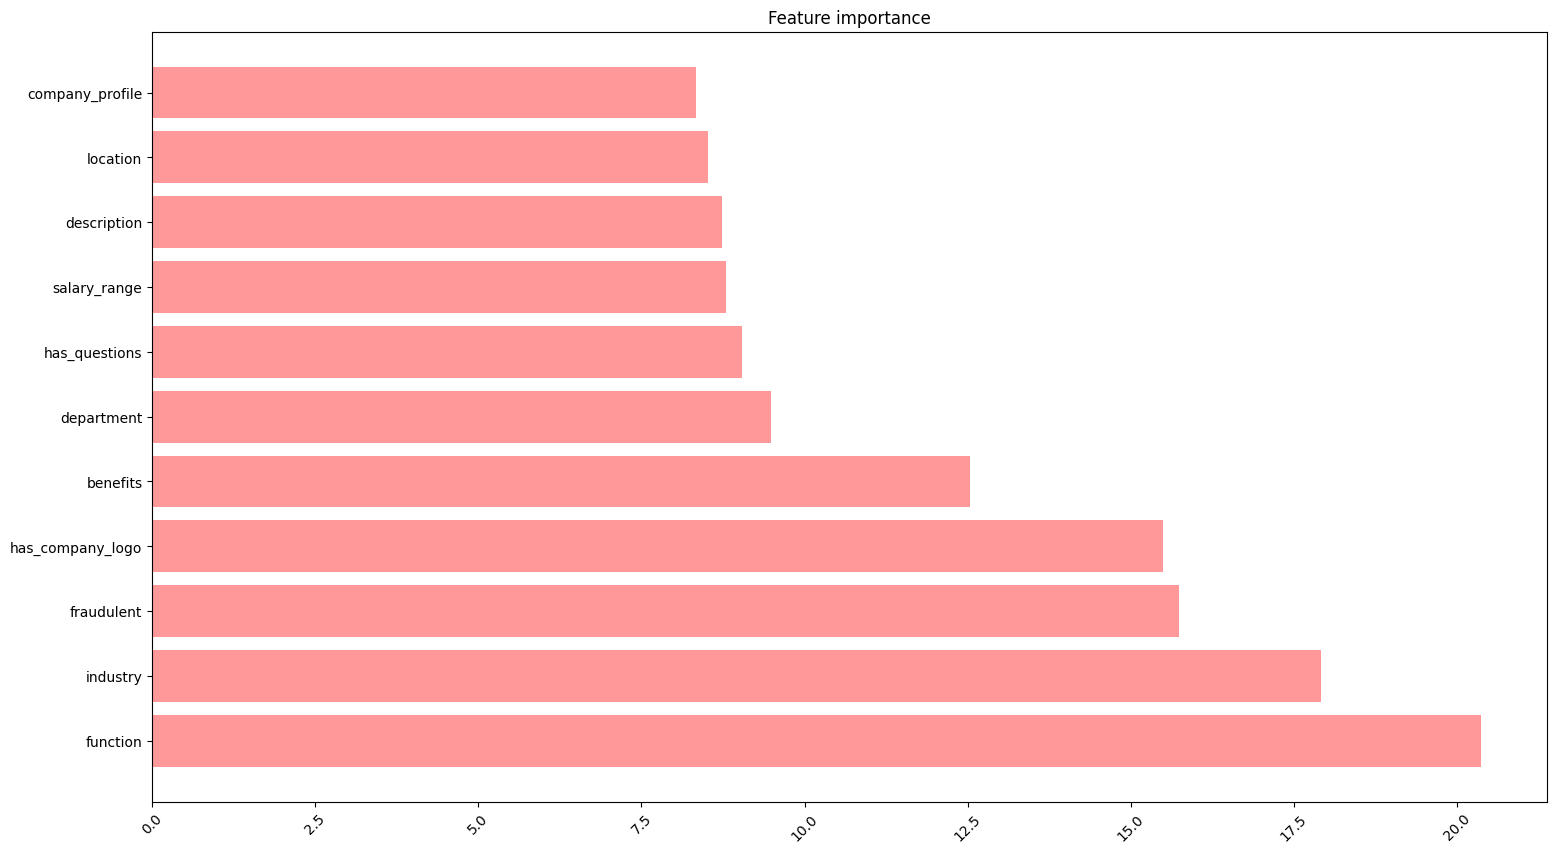

In [92]:
#Feature Importance

feature_dict = dict(zip((data_job_post.columns),list(model_rfm.feature_importances_)))

log_val = []

for i in feature_dict.values():
     log_val.append(np.log(i))

log_val = np.nan_to_num(log_val, neginf=0)
log_val = [i * (-1) for i in log_val]
names = list(feature_dict.keys())
dictionary = dict(zip(names, log_val))

sorted_dict = dict(sorted(dictionary.items(), key=lambda item: item[1], reverse=True))
names = []
values = []

for k, v in sorted_dict.items():
  if v != -0.0:
     names.append(k)
     values.append(v)

plt.figure(figsize=(18,10))
color = ['#ff9999']
plt.barh(range(len(values)), values, tick_label=names, color=color)
plt.xticks(rotation=45)
plt.title('Feature importance')
plt.show()

In [93]:
! pip install pandas-profiling
#profile.to_notebooks_iframe()

In [94]:
from pandas_profiling import ProfileReport

profile = ProfileReport(data_job_post, title="Pandas Profiling Report")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]